# Используем модель

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pickle

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/AleksKids/hedonistic-demand-from-ebay/main/Preprocessing/Great_BD.tsv", delimiter = '\t')
target = data[data["Is_Target"]==1]
target.reset_index(drop=True, inplace=True)
data = data[data["Is_Target"]==0]

In [2]:
with open("Price Model.pkl", "rb") as f:
    price_model = pickle.load(f)

In [3]:
with open("Sales Value Model.pkl", "rb") as f:
    value_model = pickle.load(f)

In [6]:
target_features = target.drop(columns = ['Title', 'Price', 'Shipping_cost', 'Sales_Count', 'Sales_Value', 'Link', 'Seller Notes', 'Model','Lock Status', 'Contract', 'Model Number', 'Style', 'MPN', 'Connectivity', 'Features', 'Memory Card Type', 'Color'])
target["Expected Price"] = price_model.predict(target_features)
target["Expected Sales Value"] = value_model.predict(target_features)

In [7]:
target

,Title,Price,Shipping_cost,Sales_Count,Sales_Value,Link,Condition,Seller Notes,Brand,Model,...,Lightning,Quad-Band,Tri-Band,Wireless charging,WAP,WCDMA,Last_Sale,Is_Target,Expected Price,Expected Sales Value
0,Nokia 3.1 C (TA1141) 32GB (Cricket) Smartphone...,31.59,5.00,34.0,1074.14,https://www.ebay.com/itm/275016352540?nordt=tr...,Used,"“Refurbished to flawless new condition, 100% G...",nokia,Nokia 3.1 C,...,0.0,0,0,0.0,0,0,2023-06-13,1,49.304158,4133.352115
1,"Nokia 6 Dual SIM 5.5"" 4GB RAM 16MP Wi-Fi GPS B...",103.50,0.00,4.0,414.00,https://www.ebay.com/itm/203145222261?nordt=tr...,Open box,“The phone is in good condition. without earph...,nokia,Nokia 6,...,0.0,0,0,0.0,0,0,2023-06-13,1,145.394653,18312.525102
2,NEW Nokia 8 V 5G UW TA1257 Verizon Unlocked LT...,161.24,0.00,8.0,1289.92,https://www.ebay.com/itm/295688872962?nordt=tr...,New,"“Refurbished to flawless new condition, 100% G...",nokia,Nokia 8,...,0.0,0,0,0.0,0,0,2023-06-13,1,198.749012,17747.440225
3,Original Nokia N8 N8-00 3G WIFI GPS 12MP Touch...,42.95,5.50,26.0,1116.79,https://www.ebay.com/itm/164928279178?nordt=tr...,Used,"“1 year warranty, refurbished to a flawless ne...",nokia,Nokia N8,...,0.0,0,0,0.0,0,0,2023-06-13,1,79.907511,5133.021891
4,Nokia G50 5G | Android 11| Unlocked Smartphone...,87.00,8.22,1.0,87.00,https://www.ebay.com/itm/145123725321?nordt=tr...,Used,“Excellent Condition.”,nokia,Nokia G50,...,0.0,0,0,0.0,0,0,2023-06-13,1,223.552450,13606.790740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5355,Xiaomi Redmi K60 5G Snapdragon Gen 8+ 67W Fast...,562.24,0.00,1.0,562.24,https://www.ebay.com/itm/295575470723?nordt=tr...,New,"“The item was used, and been restored to 100% ...",redmi,Redmi K60,...,0.0,1,1,0.0,1,1,2023-03-31,1,290.055723,35241.672517
5356,Samsung Galaxy A20- Black (T-Mobile) (Locked) ...,299.00,0.00,1.0,299.00,https://www.ebay.com/itm/295576987139?nordt=tr...,Used,"“The item was used, and been restored to 100% ...",samsung,Samsung Galaxy A20,...,0.0,0,0,0.0,0,0,2023-03-27,1,69.995650,8108.457167
5357,Xiaomi Redmi Note 11 4G Volte 128GB,180.00,9.65,1.0,180.00,https://www.ebay.com/itm/295588396316?nordt=tr...,New,"“The item was used, and been restored to 100% ...",redmi,Xiaomi Redmi Note 11,...,0.0,0,0,0.0,0,0,2023-04-01,1,308.892100,36850.918120
5358,Redmi Note 8 Pro 64gb CRACKED BACK (GSM Unlock...,70.00,10.20,1.0,70.00,https://www.ebay.com/itm/295603254066?nordt=tr...,For parts or not working,"“The item was used, and been restored to 100% ...",redmi,Redmi Note 8 Pro,...,0.0,0,0,0.0,0,0,2023-04-28,1,181.181935,19172.009247


In [8]:
target .to_csv('Nokia and Redmi estimated.tsv', index = False, sep = '\t')

# Анализ результатов

# Анализ общих результатов

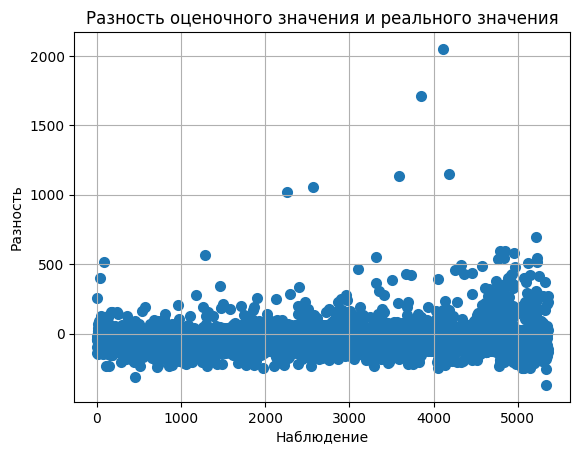

In [11]:
fig, ax = plt.subplots(1)
ax.scatter(target.index, target["Price"] - target["Expected Price"], lw=2)
ax.set_title(r'Разность оценочного значения и реального значения')
ax.set_xlabel('Наблюдение')
ax.set_ylabel('Разность')
ax.grid()

Есть выбросы. Клятые капиталисты завышают цены и народ ведётся. Правда, иногда цены занижены. Это видно на точечной диаграмме.

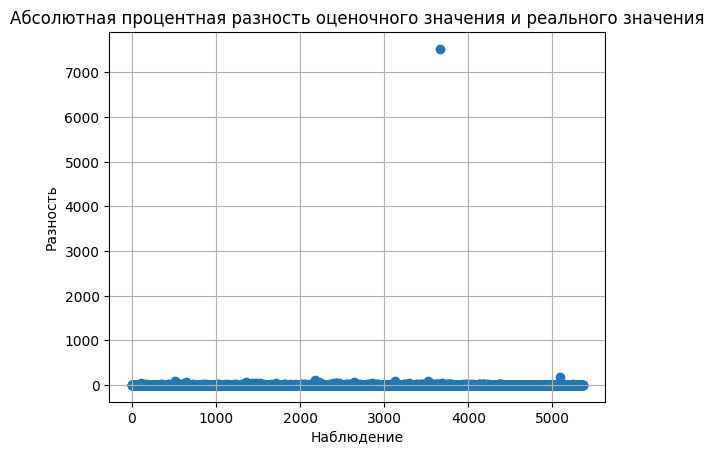

In [12]:
fig, ax = plt.subplots(1)
diff = np.abs((target["Price"] - target["Expected Price"])/target["Price"])
ax.scatter(target.index, diff)
ax.set_title('Абсолютная процентная разность оценочного значения и реального значения')
ax.set_xlabel('Наблюдение')
ax.set_ylabel('Разность')
ax.grid()
plt.show()

Есть одно значение, которое портит всю картину.

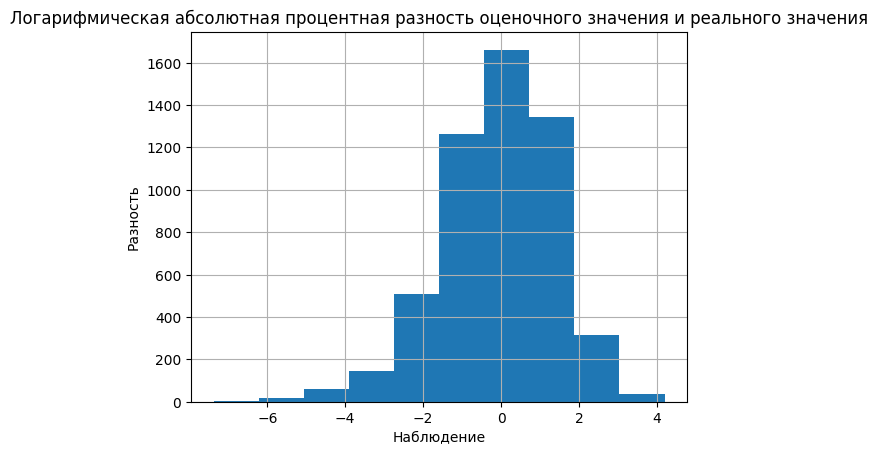

In [14]:
fig, ax = plt.subplots(1)
diff = np.abs((target["Price"] - target["Expected Price"])/target["Price"])
diff = diff[diff<np.quantile(diff, 0.999)]
ax.hist(np.log(diff))
ax.set_title('Логарифмическая абсолютная процентная разность оценочного значения и реального значения')
ax.set_xlabel('Наблюдение')
ax.set_ylabel('Разность')
ax.grid()
plt.show()

Кажется, разность между реальным значением и ожидаемым значением имеет лог. нормальное распределение.

## Анализ Nokia

Динамика популярности - Числа обозначают уровень интереса к теме по отношению к наиболее высокому показателю в таблице для определенного региона и периода времени. 100 баллов означают наивысший уровень популярности запроса, 50 – уровень популярности запроса, вдвое меньший по сравнению с первым случаем. 0 баллов означает местоположение, по которому недостаточно данных о рассматриваемом запросе.

In [63]:
nokia_trends = pd.read_csv("https://raw.githubusercontent.com/AleksKids/hedonistic-demand-from-ebay/main/Data%20Tables/Trends/Nokia.csv", delimiter = ',', index_col=0)
nokia_trends.index = pd.to_datetime(nokia_trends.index)
nokia_trends

,Nokia: (По всему миру)
День,
2023-03-14,87
2023-03-15,82
2023-03-16,84
2023-03-17,79
2023-03-18,80
...,...
2023-06-06,80
2023-06-07,79
2023-06-08,78


In [99]:
nokia_trends = ((nokia_trends-nokia_trends.min(axis=0))/(nokia_trends.max(axis=0)-nokia_trends.min(axis=0)))*100

In [100]:
Nokia = target[target["Brand"] == "nokia"]
Nokia["Last_Sale"] = pd.to_datetime(Nokia["Last_Sale"])
Nokia.head()

C:\Users\druny\AppData\Local\Temp\ipykernel_27112\3917033752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Nokia["Last_Sale"] = pd.to_datetime(Nokia["Last_Sale"])


,Title,Price,Shipping_cost,Sales_Count,Sales_Value,Link,Condition,Seller Notes,Brand,Model,...,Lightning,Quad-Band,Tri-Band,Wireless charging,WAP,WCDMA,Last_Sale,Is_Target,Expected Price,Expected Sales Value
0,Nokia 3.1 C (TA1141) 32GB (Cricket) Smartphone...,31.59,5.00,34.0,1074.14,https://www.ebay.com/itm/275016352540?nordt=tr...,Used,"“Refurbished to flawless new condition, 100% G...",nokia,Nokia 3.1 C,...,0.0,0,0,0.0,0,0,2023-06-13,1,49.304158,4133.352115
1,"Nokia 6 Dual SIM 5.5"" 4GB RAM 16MP Wi-Fi GPS B...",103.50,0.00,4.0,414.00,https://www.ebay.com/itm/203145222261?nordt=tr...,Open box,“The phone is in good condition. without earph...,nokia,Nokia 6,...,0.0,0,0,0.0,0,0,2023-06-13,1,145.394653,18312.525102
2,NEW Nokia 8 V 5G UW TA1257 Verizon Unlocked LT...,161.24,0.00,8.0,1289.92,https://www.ebay.com/itm/295688872962?nordt=tr...,New,"“Refurbished to flawless new condition, 100% G...",nokia,Nokia 8,...,0.0,0,0,0.0,0,0,2023-06-13,1,198.749012,17747.440225
3,Original Nokia N8 N8-00 3G WIFI GPS 12MP Touch...,42.95,5.50,26.0,1116.79,https://www.ebay.com/itm/164928279178?nordt=tr...,Used,"“1 year warranty, refurbished to a flawless ne...",nokia,Nokia N8,...,0.0,0,0,0.0,0,0,2023-06-13,1,79.907511,5133.021891
4,Nokia G50 5G | Android 11| Unlocked Smartphone...,87.00,8.22,1.0,87.00,https://www.ebay.com/itm/145123725321?nordt=tr...,Used,“Excellent Condition.”,nokia,Nokia G50,...,0.0,0,0,0.0,0,0,2023-06-13,1,223.552450,13606.790740



Группируем

In [101]:
grouped_Nokia = Nokia.groupby('Last_Sale').agg({'Price': 'mean', 'Expected Price': 'mean', 'Sales_Count': 'sum', 'Sales_Value': 'sum', 'Expected Sales Value': 'sum'})
grouped_Nokia

,Price,Expected Price,Sales_Count,Sales_Value,Expected Sales Value
Last_Sale,,,,,
2023-03-10,70.000000,92.706962,3.0,213.00,16025.554160
2023-03-11,173.342222,156.194784,44.0,11754.31,119777.221600
2023-03-12,60.248000,108.842512,8.0,463.50,61971.834930
2023-03-13,48.376923,91.780296,118.0,7191.68,172567.805497
2023-03-14,47.238182,85.121645,58.0,2355.57,98914.253649
...,...,...,...,...,...
2023-06-09,70.050500,116.060048,505.0,45499.48,787876.184577
2023-06-10,59.909608,108.146513,269.0,14300.19,495558.612258
2023-06-11,58.880308,118.885410,1080.0,59833.14,864295.743787


Переводим в отрезок [0-100].

In [102]:
grouped_Nokia_scaled = (grouped_Nokia - grouped_Nokia.min(axis = 0)) /(grouped_Nokia.max(axis = 0) - grouped_Nokia.min(axis = 0)) *100
grouped_Nokia_scaled

,Price,Expected Price,Sales_Count,Sales_Value,Expected Sales Value
Last_Sale,,,,,
2023-03-10,22.090352,10.672551,0.000000,0.000000,0.000000
2023-03-11,100.000000,100.000000,1.726316,12.638757,12.230969
2023-03-12,14.738324,33.375292,0.210526,0.274320,5.416468
2023-03-13,5.788725,9.368731,4.842105,7.642273,18.454291
2023-03-14,4.930229,0.000000,2.315789,2.346304,9.771497
...,...,...,...,...,...
2023-06-09,22.128424,43.530374,21.136842,49.592709,90.991130
2023-06-10,14.483210,32.396019,11.200000,15.426722,56.530698
2023-06-11,13.707221,47.505662,45.347368,65.289337,100.000000


In [103]:
grouped_Nokia_scaled = pd.merge(grouped_Nokia_scaled, nokia_trends, right_index=True, left_on="Last_Sale", how="inner")
grouped_Nokia_scaled

,Price,Expected Price,Sales_Count,Sales_Value,Expected Sales Value,Nokia: (По всему миру)
Last_Sale,,,,,,
2023-03-14,4.930229,0.000000,2.315789,2.346304,9.771497,60.606061
2023-03-15,20.871354,49.588112,5.178947,9.299208,11.997999,45.454545
2023-03-16,6.778955,21.732136,4.505263,9.892713,54.385715,51.515152
2023-03-17,12.760845,18.977995,4.168421,4.834422,44.361579,36.363636
2023-03-18,15.865296,22.805081,6.778947,8.888342,61.955173,39.393939
...,...,...,...,...,...,...
2023-06-06,7.371351,53.869737,20.505263,17.456786,92.090200,39.393939
2023-06-07,7.536200,23.498147,7.200000,12.789025,76.755781,36.363636
2023-06-08,6.135129,33.050895,40.926316,52.110395,79.742677,33.333333


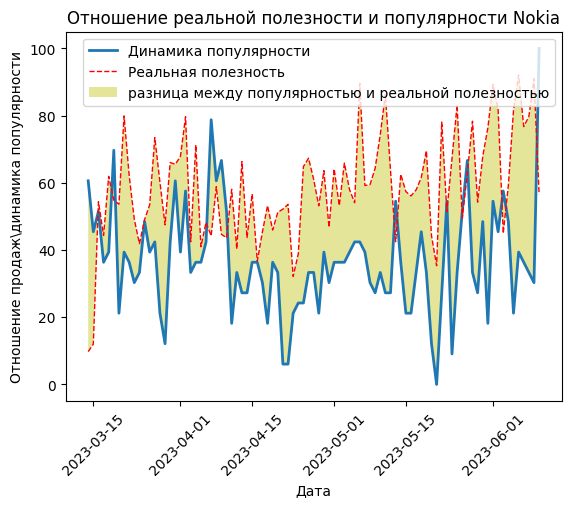

In [104]:
plt.title("Отношение реальной полезности и популярности Nokia")
plt.plot(grouped_Nokia_scaled.index, grouped_Nokia_scaled["Nokia: (По всему миру)"], lw=2, label='Динамика популярности')
plt.plot(grouped_Nokia_scaled.index, grouped_Nokia_scaled["Expected Sales Value"], lw=1, label='Реальная полезность', color='r', ls='--')
plt.fill_between(grouped_Nokia_scaled.index, grouped_Nokia_scaled["Nokia: (По всему миру)"], grouped_Nokia_scaled["Expected Sales Value"], facecolor='y', alpha=0.4,
                label='разница между популярностью и реальной полезностью')
plt.xticks(rotation=45)
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Отношение продаж\динамика популярности')
plt.show()

Мы видим, что популярность Nokia в сравнении реальной ценностью смартфонов данной линейки существенно занижена. Nokia предлагает достаточно хороший смартфоны, тем не менее, не получает признания общества. Вероятно, это связано с неверным позиционированием и рекламной компанией, предрассудками общества.

## Анализ Redmi

Динамика популярности - Числа обозначают уровень интереса к теме по отношению к наиболее высокому показателю в таблице для определенного региона и периода времени. 100 баллов означают наивысший уровень популярности запроса, 50 – уровень популярности запроса, вдвое меньший по сравнению с первым случаем. 0 баллов означает местоположение, по которому недостаточно данных о рассматриваемом запросе.

In [132]:
redmi_trends = pd.read_csv("https://raw.githubusercontent.com/AleksKids/hedonistic-demand-from-ebay/main/Data%20Tables/Trends/Redmi.csv", delimiter = ',', index_col=0)
redmi_trends.index = pd.to_datetime(redmi_trends.index)
redmi_trends

,Redmi: (По всему миру)
День,
2023-03-14,81
2023-03-15,76
2023-03-16,82
2023-03-17,80
2023-03-18,90
...,...
2023-06-06,87
2023-06-07,88
2023-06-08,88


In [133]:
redmi_trends = ((redmi_trends-redmi_trends.min(axis=0))/(redmi_trends.max(axis=0)-redmi_trends.min(axis=0)))*100
redmi_trends

,Redmi: (По всему миру)
День,
2023-03-14,20.833333
2023-03-15,0.000000
2023-03-16,25.000000
2023-03-17,16.666667
2023-03-18,58.333333
...,...
2023-06-06,45.833333
2023-06-07,50.000000
2023-06-08,50.000000


In [134]:
Redmi = target[target["Brand"] == "redmi"]
Redmi["Last_Sale"] = pd.to_datetime(Redmi["Last_Sale"])
Redmi.head()

C:\Users\druny\AppData\Local\Temp\ipykernel_27112\1297013096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Redmi["Last_Sale"] = pd.to_datetime(Redmi["Last_Sale"])


,Title,Price,Shipping_cost,Sales_Count,Sales_Value,Link,Condition,Seller Notes,Brand,Model,...,Lightning,Quad-Band,Tri-Band,Wireless charging,WAP,WCDMA,Last_Sale,Is_Target,Expected Price,Expected Sales Value
4467,Xiaomi Redmi Note 11 128GB 4GB RAM GSM Unlocke...,187.39,7.10,772.0,144668.87,https://www.ebay.com/itm/325013923406?nordt=tr...,New,"“The item was used, and been restored to 100% ...",redmi,Redmi Note 11,...,0.0,0,0,0.0,0,0,2023-05-14,1,182.539397,18693.556800
4468,Xiaomi Redmi Note 10 Pro 128GB 6GB RAM GSM FAC...,282.12,12.05,455.0,128364.84,https://www.ebay.com/itm/324648557855?nordt=tr...,New,"“The item was used, and been restored to 100% ...",redmi,Xiaomi Redmi Note 10 Pro,...,0.0,0,0,0.0,0,0,2023-05-05,1,249.535255,20416.890450
4469,Xiaomi Redmi Note 11 Pro+ 5G Plus 256GB 8GB RA...,395.19,12.25,408.0,161235.53,https://www.ebay.com/itm/203898287868?nordt=tr...,New,"“The item was used, and been restored to 100% ...",redmi,Redmi Note 11 Pro+ 5G,...,0.0,0,0,0.0,0,0,2023-05-10,1,316.822280,24689.225925
4470,Xiaomi Redmi Note 10 *5G* 128GB 4GB RAM GSM Un...,195.45,8.60,428.0,83654.10,https://www.ebay.com/itm/324618206904?nordt=tr...,New,"“The item was used, and been restored to 100% ...",redmi,Xiaomi Redmi Note 10 5G,...,0.0,1,1,0.0,1,1,2023-01-18,1,181.867103,15821.958820
4471,Xiaomi Redmi Note 10 Pro 128GB 6GB RAM (FACTOR...,333.06,18.81,366.0,121900.18,https://www.ebay.com/itm/194060416913?nordt=tr...,New,"“The item was used, and been restored to 100% ...",redmi,Redmi Note 10 Pro,...,0.0,0,0,0.0,0,0,2023-05-11,1,291.056048,30861.698567



Группируем

In [135]:
grouped_Redmi = Redmi.groupby('Last_Sale').agg({'Price': 'mean', 'Expected Price': 'mean', 'Sales_Count': 'sum', 'Sales_Value': 'sum', 'Expected Sales Value': 'sum'})
grouped_Redmi

,Price,Expected Price,Sales_Count,Sales_Value,Expected Sales Value
Last_Sale,,,,,
2021-05-25,224.990000,195.723809,1.0,224.99,20325.377479
2021-05-26,579.950000,290.055723,1.0,579.95,35241.672517
2021-05-30,15.670000,129.420437,1.0,15.67,14769.365179
2021-06-04,172.490000,158.541421,1.0,172.49,22466.400667
2021-06-06,229.000000,135.568150,2.0,458.00,28292.193473
...,...,...,...,...,...
2023-05-10,216.980000,181.903778,543.0,200372.11,405175.299220
2023-05-11,292.442778,213.682285,724.0,179272.57,385559.468351
2023-05-12,238.397273,218.771535,107.0,28755.65,250136.355631


Переводим в отрезок [0-100].

In [136]:
grouped_Redmi_scaled = (grouped_Redmi - grouped_Redmi.min(axis = 0)) /(grouped_Redmi.max(axis = 0) - grouped_Redmi.min(axis = 0)) *100
grouped_Redmi_scaled

,Price,Expected Price,Sales_Count,Sales_Value,Expected Sales Value
Last_Sale,,,,,
2021-05-25,22.634083,44.191119,0.000000,0.072074,2.926779
2021-05-26,61.016436,69.897537,0.000000,0.194295,5.735714
2021-05-30,0.000000,26.122768,0.000000,0.000000,1.880508
2021-06-04,16.957180,34.058536,0.000000,0.053997,3.329962
2021-06-06,23.067690,27.798083,0.061920,0.152305,4.427036
...,...,...,...,...,...
2023-05-10,21.767950,40.425018,33.560372,68.987601,75.399104
2023-05-11,29.927852,49.084989,44.767802,61.722516,71.705184
2023-05-12,24.083831,50.471862,6.563467,9.895875,46.203222


In [137]:
grouped_Redmi_scaled = pd.merge(grouped_Redmi_scaled, redmi_trends, right_index=True, left_on="Last_Sale", how="inner")
grouped_Redmi_scaled

,Price,Expected Price,Sales_Count,Sales_Value,Expected Sales Value,Redmi: (По всему миру)
Last_Sale,,,,,,
2023-03-14,19.282007,42.371388,0.123839,0.194991,2.577660,20.833333
2023-03-15,57.489187,43.555508,0.123839,0.559985,3.452237,0.000000
2023-03-16,12.074232,33.415998,11.826625,19.597024,8.450224,25.000000
2023-03-17,10.522996,37.660797,0.123839,0.111317,15.546684,16.666667
2023-03-18,16.468101,47.482236,1.733746,2.423851,38.116012,58.333333
...,...,...,...,...,...,...
2023-05-10,21.767950,40.425018,33.560372,68.987601,75.399104,37.500000
2023-05-11,29.927852,49.084989,44.767802,61.722516,71.705184,20.833333
2023-05-12,24.083831,50.471862,6.563467,9.895875,46.203222,37.500000


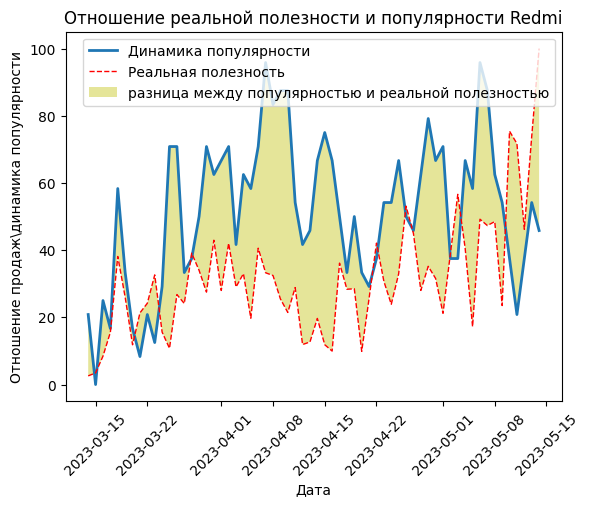

In [139]:
plt.title("Отношение реальной полезности и популярности Redmi")
plt.plot(grouped_Redmi_scaled.index, grouped_Redmi_scaled["Redmi: (По всему миру)"], lw=2, label='Динамика популярности')
plt.plot(grouped_Redmi_scaled.index, grouped_Redmi_scaled["Expected Sales Value"], lw=1, label='Реальная полезность', color='r', ls='--')
plt.fill_between(grouped_Redmi_scaled.index, grouped_Redmi_scaled["Redmi: (По всему миру)"], grouped_Redmi_scaled["Expected Sales Value"], facecolor='y', alpha=0.4,
                label='разница между популярностью и реальной полезностью')
plt.xticks(rotation=45)
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Отношение продаж\динамика популярности')
plt.show()